In [1]:
# Note: you need to use a different environment than DeepfakeBench to run this notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from parametric_umap import ParametricUMAP

/data/home/anantajit/Forensics/DeepfakeBench/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
datapath = '../logs/lsda_epoch_0_no_edit_feature_vectors.pkl'

with open(datapath, 'rb') as f:
    data = pickle.load(f)

# data should be a dictionary with keys 'vectors' and 'labels'
vectors = data['vectors']
labels = data['labels']

In [3]:
# each feature vector is 12 x 512 x 8 x 8
# technically, the classifier takes the last 8x8 and averages it so the actual classifier input is 12 x 512
# might be needed if dimensions get too crazy
# for each vector in list vectors, flatten it. Then combine them all into a numpy array

# first, remove any vectors (and corresponding labels) which are not 12 x 512 x 8 x 8
labels = [l for l, v in zip(labels, vectors) if v.shape == (12, 512, 8, 8)]
vectors = [v for v in vectors if v.shape == (12, 512, 8, 8)]
assert len(labels) == len(vectors)

# next, take each vector and flatten it. put all these vecgtors into a single numpy array
flattened_vectors = np.array([v.flatten() for v in vectors])
labels = np.array(labels)

In [16]:
pumap = ParametricUMAP(
    device='cuda:1',
    n_components=2,
    hidden_dim=256,
    n_layers=6,
    n_epochs=20,
    batch_size=1024
)

embeddings = pumap.fit_transform(flattened_vectors)

Sampling negative edges...


Completed processes: 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]


Training...


Epochs:   5%|▌         | 1/20 [00:19<06:04, 19.20s/it, loss=1.0595]

Epoch 1/20, Loss: 1.0595


Epochs:  10%|█         | 2/20 [00:38<05:47, 19.33s/it, loss=0.1559]

Epoch 2/20, Loss: 0.1559


Epochs:  15%|█▌        | 3/20 [00:58<05:29, 19.36s/it, loss=0.1288]

Epoch 3/20, Loss: 0.1288


Epochs:  20%|██        | 4/20 [01:17<05:11, 19.49s/it, loss=0.1235]

Epoch 4/20, Loss: 0.1235


Epochs:  25%|██▌       | 5/20 [01:37<04:52, 19.49s/it, loss=0.1189]

Epoch 5/20, Loss: 0.1189


Epochs:  30%|███       | 6/20 [01:56<04:32, 19.49s/it, loss=0.1156]

Epoch 6/20, Loss: 0.1156


Epochs:  35%|███▌      | 7/20 [02:16<04:13, 19.48s/it, loss=0.1135]

Epoch 7/20, Loss: 0.1135


Epochs:  40%|████      | 8/20 [02:35<03:53, 19.49s/it, loss=0.1133]

Epoch 8/20, Loss: 0.1133


Epochs:  45%|████▌     | 9/20 [02:55<03:34, 19.49s/it, loss=0.1112]

Epoch 9/20, Loss: 0.1112


Epochs:  50%|█████     | 10/20 [03:14<03:14, 19.48s/it, loss=0.1100]

Epoch 10/20, Loss: 0.1100


Epochs:  55%|█████▌    | 11/20 [03:34<02:56, 19.56s/it, loss=0.1102]

Epoch 11/20, Loss: 0.1102


Epochs:  60%|██████    | 12/20 [03:53<02:36, 19.53s/it, loss=0.1110]

Epoch 12/20, Loss: 0.1110


Epochs:  65%|██████▌   | 13/20 [04:13<02:16, 19.51s/it, loss=0.1084]

Epoch 13/20, Loss: 0.1084


Epochs:  70%|███████   | 14/20 [04:32<01:57, 19.52s/it, loss=0.1079]

Epoch 14/20, Loss: 0.1079


Epochs:  75%|███████▌  | 15/20 [04:52<01:37, 19.51s/it, loss=0.1113]

Epoch 15/20, Loss: 0.1113


Epochs:  80%|████████  | 16/20 [05:11<01:17, 19.49s/it, loss=0.1089]

Epoch 16/20, Loss: 0.1089


Epochs:  85%|████████▌ | 17/20 [05:31<00:58, 19.53s/it, loss=0.1074]

Epoch 17/20, Loss: 0.1074


Epochs:  90%|█████████ | 18/20 [05:51<00:39, 19.59s/it, loss=0.1069]

Epoch 18/20, Loss: 0.1069


Epochs:  95%|█████████▌| 19/20 [06:10<00:19, 19.55s/it, loss=0.1067]

Epoch 19/20, Loss: 0.1067


Epochs: 100%|██████████| 20/20 [06:30<00:00, 19.50s/it, loss=0.1057]


Epoch 20/20, Loss: 0.1057


Text(0.5, 1.0, 'Parametric UMAP Embeddings of LSDA Feature Vectors')

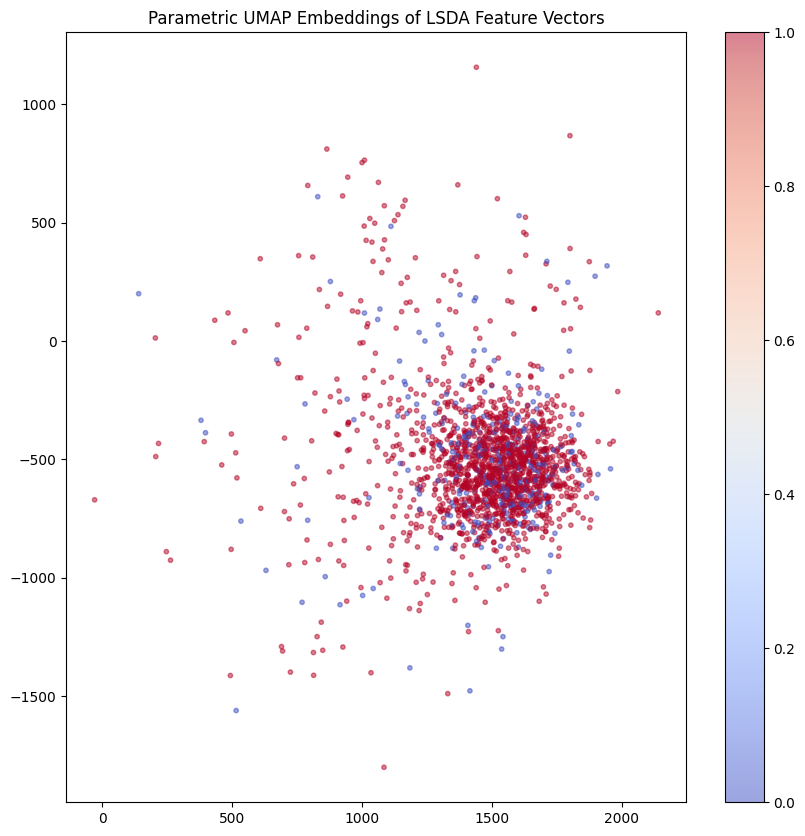

In [17]:
# scatter embeddings, with color based on label (0 is blue, 1 is orange)
plt.figure(figsize=(10, 10))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='coolwarm', s=10, alpha=0.5)
plt.colorbar()
plt.title('Parametric UMAP Embeddings of LSDA Feature Vectors')